# IDS705- Final Project

**Main idea of this file** 
The goal of this analysis is to examine whether diabetes is associated with a higher likelihood of cardiovascular disease (CVD), using a logistic regression model on health survey data.

**Data Plan**
- Source: A cleaned CSV dataset containing individual-level health information(https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).
- Target Variable: cvd (binary): whether the individual has cardiovascular disease.
- Key Predictor:diabetes (binary): whether the individual has diabetes.
- Preparation Steps: Drop duplicate rows. Reset the index and rename columns for clarity.

**Technical Detail**
- Exploratory Analysis: Compared CVD rates between diabetic and non-diabetic individuals. Used pd.crosstab to examine the relationship.
- Modeling Approach: Logistic Regression via statsmodels.Logit:
- Response: cvd
- Predictor: diabetes (with intercept) Assessed coefficient significance through standard output (z-values, p-values).
- Marginal Effects: Estimated average marginal effects to interpret how diabetes affects CVD probability on the probability scale.



## Data Loading and PreProcessing

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [15]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

import warnings

warnings.filterwarnings("ignore")
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)
# https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

In [16]:
# columns
print(X.columns)
print(y.columns)

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Index(['Diabetes_binary'], dtype='object')


In [19]:
# Age is critical feature related  to our topic- younger CVD
age_map = {
    1: "18-24",
    2: "25-29",
    3: "30-34",
    4: "35-39",
    5: "40-44",
    6: "45-49",
    7: "50-54",
    8: "55-59",
    9: "60-64",
    10: "65-69",
    11: "70-74",
    12: "75-79",
    13: "80+",
}

X["AgeGroup"] = X["Age"].map(age_map)
from pandas.api.types import CategoricalDtype

age_order = list(age_map.values())
X["AgeGroup"] = X["AgeGroup"].astype(
    CategoricalDtype(categories=age_order, ordered=True)
)

df = pd.concat([X, y], axis=1)

# df.head

In [20]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,AgeGroup,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,5,18,15,1,0,9,4,3,60-64,0
1,0,0,0,25,1,0,0,1,0,0,...,3,0,0,0,0,7,6,1,50-54,0
2,1,1,1,28,0,0,0,0,1,0,...,5,30,30,1,0,9,4,8,60-64,0
3,1,0,1,27,0,0,0,1,1,1,...,2,0,0,0,0,11,3,6,70-74,0
4,1,1,1,24,0,0,0,1,1,1,...,2,3,0,0,0,11,5,4,70-74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,3,0,5,0,1,5,6,7,40-44,0
253676,1,1,1,18,0,0,0,0,0,0,...,4,0,0,1,0,11,2,4,70-74,1
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,0,0,0,2,5,2,25-29,0
253678,1,0,1,23,0,0,0,0,1,1,...,3,0,0,0,1,7,5,1,50-54,0


In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming you have the dataset loaded as `df`)
# Here we use a copy of df that you have prepared earlier.
df = df.copy()

# Data Preprocessing
# Convert categorical variables into dummy variables
df = pd.get_dummies(
    df, columns=["AgeGroup", "Sex", "Education", "Income"], drop_first=True
)

# Check for any missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Diabetes_binary         0
AgeGroup_25-29          0
AgeGroup_30-34          0
AgeGroup_35-39          0
AgeGroup_40-44          0
AgeGroup_45-49          0
AgeGroup_50-54          0
AgeGroup_55-59          0
AgeGroup_60-64          0
AgeGroup_65-69          0
AgeGroup_70-74          0
AgeGroup_75-79          0
AgeGroup_80+            0
Sex_1                   0
Education_2             0
Education_3             0
Education_4             0
Education_5             0
Education_6             0
Income_

In [24]:
# Prepare the independent variables (X) and the dependent variable (y)
X = df.drop(columns=["HeartDiseaseorAttack", "Diabetes_binary"])
y = df["HeartDiseaseorAttack"]  # Target variable (binary)

# Convert boolean columns to integers (True -> 1, False -> 0)
bool_columns = [
    "AgeGroup_25-29",
    "AgeGroup_30-34",
    "AgeGroup_35-39",
    "AgeGroup_40-44",
    "AgeGroup_45-49",
    "AgeGroup_50-54",
    "AgeGroup_55-59",
    "AgeGroup_60-64",
    "AgeGroup_65-69",
    "AgeGroup_70-74",
    "AgeGroup_75-79",
    "AgeGroup_80+",
    "Sex_1",
    "Education_2",
    "Education_3",
    "Education_4",
    "Education_5",
    "Education_6",
    "Income_2",
    "Income_3",
    "Income_4",
    "Income_5",
    "Income_6",
    "Income_7",
    "Income_8",
]

# Apply the conversion to integer (True -> 1, False -> 0)
X[bool_columns] = X[bool_columns].astype(int)

# Add constant to X (for intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.238737
         Iterations 9
                            Logit Regression Results                            
Dep. Variable:     HeartDiseaseorAttack   No. Observations:               253680
Model:                            Logit   Df Residuals:                   253637
Method:                             MLE   Df Model:                           42
Date:                  Wed, 23 Apr 2025   Pseudo R-squ.:                  0.2351
Time:                          21:56:22   Log-Likelihood:                -60563.
converged:                         True   LL-Null:                       -79178.
Covariance Type:              nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -8.0849        nan        nan        nan         nan     

In [25]:
# Predicted probabilities for each individual
predicted_probs = result.predict(X)

# Add predicted probabilities to the dataframe
df["predicted_prob"] = predicted_probs

# Calculate the average predicted probability for individuals with diabetes (T = 1)
ate_diabetes = df[df["Diabetes_binary"] == 1]["predicted_prob"].mean()

# Calculate the average predicted probability for individuals without diabetes (T = 0)
ate_no_diabetes = df[df["Diabetes_binary"] == 0]["predicted_prob"].mean()

# Calculate the ATE
ate = ate_diabetes - ate_no_diabetes

print(f"Average Treatment Effect (ATE): {ate}")

Average Treatment Effect (ATE): 0.12045634209134377


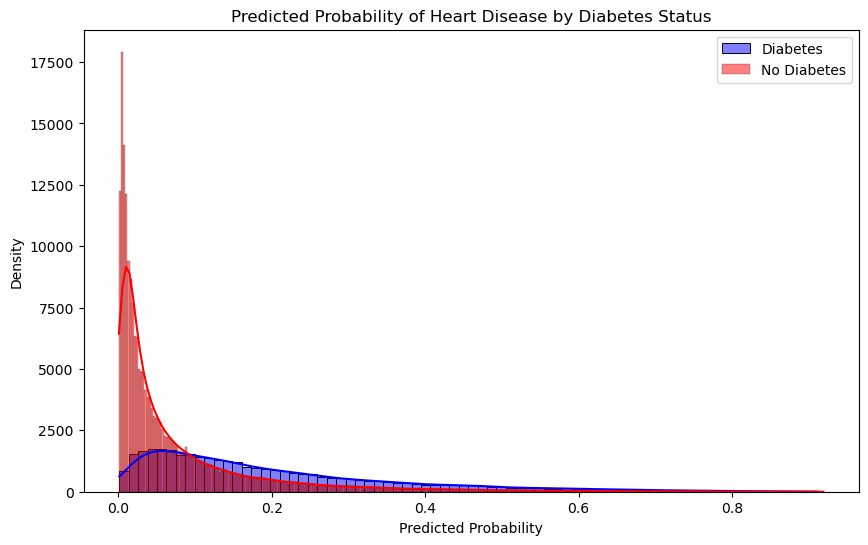

In [26]:
# Optionally: Visualize the predicted probabilities by diabetes status
plt.figure(figsize=(10, 6))
sns.histplot(
    df[df["Diabetes_binary"] == 1]["predicted_prob"],
    color="blue",
    label="Diabetes",
    kde=True,
)
sns.histplot(
    df[df["Diabetes_binary"] == 0]["predicted_prob"],
    color="red",
    label="No Diabetes",
    kde=True,
)
plt.title("Predicted Probability of Heart Disease by Diabetes Status")
plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.legend()
plt.show()